In [353]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from matplotlib import pyplot as plt

In [299]:
propertyData_df1 = pd.read_csv("./datasets/CSTDAT10655_Output1_20220822.csv",encoding='latin1')
print(propertyData_df1.head())

/var/folders/qh/__j58r2568d6gfl4x7l64qwh0000gn/T/ipykernel_70130/3664652824.py:1: DtypeWarning: Columns (5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  propertyData_df1 = pd.read_csv("./CSTDAT10655_Output_20220822/CSTDAT10655_Output1_20220822.csv",encoding='latin1')


   CL_QPID  CL_Sale_ID  CL_Building_ID CL_Situation_Number  \
0   629180     3223584               0                 14    
1   629180     3992193               0                 14    
2   629181      844148               0                 16    
3   629187     6184761               0                 49    
4   629195     4627781               0                  9    

   CL_TA7_MissingMB_Situation_Number CL_TA7_MissingMB_Additional_Number  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   

  CL_Street_Name CL_Street_Name_Suffix CL_Street_Name_Direction CL_Suburb  \
0           Ford                    St                      NaN   Opotiki   
1           Ford      

In [300]:
propertyData_df2 = pd.read_csv("./datasets/CSTDAT10655_Output2_20220822.csv",encoding='latin1')
print(propertyData_df2.head())

   CL_QPID   CL_Val_Ref  CL_Latitude  CL_Longitude  CL_Bedrooms  CL_Bathrooms
0  2416987   21851/2755   -43.477322    172.709781          4.0           1.0
1  2847968  28044/40700   -46.062788    170.194987          4.0           1.0
2  3299437    6622/6569          NaN           NaN          NaN           1.0
3   410286   4482/68000   -38.021743    175.324990          2.0           2.0
4  1652110  34643/12025   -37.014415    174.915014          NaN           1.0


In [301]:
propertyData_df = propertyData_df1.merge(propertyData_df2,on="CL_QPID")
print(propertyData_df)

         CL_QPID  CL_Sale_ID  CL_Building_ID CL_Situation_Number  \
0         629180     3223584               0                 14    
1         629180     3992193               0                 14    
2         629180      844145               0                 14    
3         629180      844146               0                 14    
4         629180      844147               0                 14    
...          ...         ...             ...                 ...   
3225866  3343063     6797260               0                 43    
3225867  3344456     6795981               0                  7    
3225868  3344458     6795909               0                  3    
3225869  3344634     6796849               0              49 47    
3225870  3344639     6261671               0                 22    

         CL_TA7_MissingMB_Situation_Number CL_TA7_MissingMB_Additional_Number  \
0                                      NaN                                NaN   
1                    

In [302]:
pd.set_option('display.max_columns', len(propertyData_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
print(propertyData_df.head(3))

   CL_QPID  CL_Sale_ID  CL_Building_ID CL_Situation_Number  \
0   629180     3223584               0                 14    
1   629180     3992193               0                 14    
2   629180      844145               0                 14    

   CL_TA7_MissingMB_Situation_Number CL_TA7_MissingMB_Additional_Number  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                NaN                                NaN   

  CL_Street_Name CL_Street_Name_Suffix CL_Street_Name_Direction CL_Suburb  \
0           Ford                    St                      NaN   Opotiki   
1           Ford                    St                      NaN   Opotiki   
2           Ford                    St                      NaN   Opotiki   

   CL_Town  CL_RegionID         CL_RegionName  CL_TAcode         CL_TAName  \
0  Opotiki            4  Bay of Plenty Region         27  Opoti

In [303]:
propertyData_df.CL_RegionName.unique()

array(['Bay of Plenty Region', 'Waikato Region',
       'Manawatu-Whanganui Region', 'Gisborne (Unitary)',
       'Northland Region', 'Auckland (Unitary)', 'Hawkes Bay Region',
       'Taranaki Region', 'Wellington Region',
       'Tasman Nelson Marlborough', 'West Coast Region',
       'Canterbury Region', 'Chathams', 'Otago Region',
       'Southland Region'], dtype=object)

In [304]:
AKL_df = propertyData_df[propertyData_df['CL_RegionName'] == 'Auckland (Unitary)']
print(AKL_df.head())

       CL_QPID  CL_Sale_ID  CL_Building_ID CL_Situation_Number  \
64588    75499     4334516               0                982    
64589    75639     2531689               0                 45    
64590    75639     3380545               0                 45    
64591    75639       80588               0                 45    
64592    75639     3194135               0                 45    

       CL_TA7_MissingMB_Situation_Number CL_TA7_MissingMB_Additional_Number  \
64588                                NaN                                NaN   
64589                                NaN                                NaN   
64590                                NaN                                NaN   
64591                                NaN                                NaN   
64592                                NaN                                NaN   

      CL_Street_Name CL_Street_Name_Suffix CL_Street_Name_Direction  \
64588      Mangawhai                    Rd               

In [305]:
AKL_df.isnull().sum()

CL_QPID                                         0
CL_Sale_ID                                      0
CL_Building_ID                                  0
CL_Situation_Number                             0
CL_TA7_MissingMB_Situation_Number          987628
CL_TA7_MissingMB_Additional_Number         990228
CL_Street_Name                                  0
CL_Street_Name_Suffix                        7226
CL_Street_Name_Direction                   985811
CL_Suburb                                   12292
CL_Town                                      7375
CL_RegionID                                     0
CL_RegionName                                   0
CL_TAcode                                       0
CL_TAName                                       0
CL_Meshblock                                28100
CL_SAU                                      28100
CL_Sale_Tenure                                  0
CL_Sale_Price_Value_Relationship                0
CL_Sale_Date                                    0


In [306]:
AKL_df = AKL_df.drop(['CL_MAS_Class_Surrounding_Improvmnt_Type', 'CL_MAS_Contour', 'CL_MAS_View',
        'CL_MAS_View_Scope', 'CL_MAS_Modernisation', 'CL_MAS_House_Type_Description',
        'CL_MAS_Deck_Indicator', 'CL_MAS_Driveway_Indicator', 'CL_MAS_Free_Standing_Garages',
        'CL_MAS_Estimated_Year_Built', 'CL_MAS_Landscaping_Quality', 'CL_MAS_Lot_Position','CL_TA7_MissingMB_Situation_Number',
        'CL_TA7_MissingMB_Additional_Number',
        'CL_Street_Name_Direction', 'CL_Sale_Price_Value_Relationship'], axis = 1)

<AxesSubplot:>

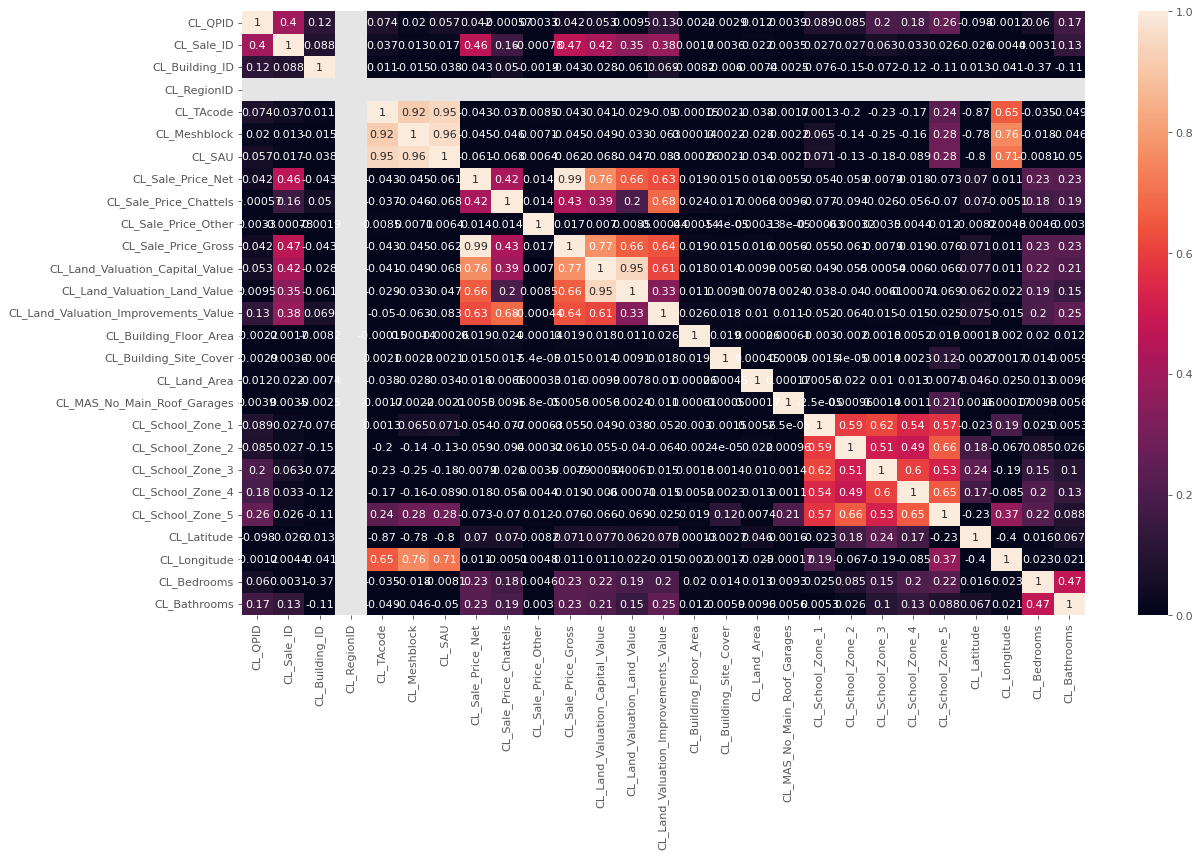

In [307]:
fig = plt.figure(figsize = (17,10), dpi = 80)
sns.heatmap(AKL_df.corr(), annot = True, vmin = 0, vmax = 1)

In [308]:
AKL_df = AKL_df.drop(['CL_Sale_ID', 'CL_Building_ID', 'CL_Situation_Number',
             'CL_Street_Name','CL_Street_Name_Suffix', 'CL_Town',
             'CL_RegionID','CL_RegionName', 'CL_TAcode', 'CL_TAName',
             'CL_Meshblock', 'CL_SAU', 'CL_Sale_Price_Chattels'], axis = 1)

<AxesSubplot:>

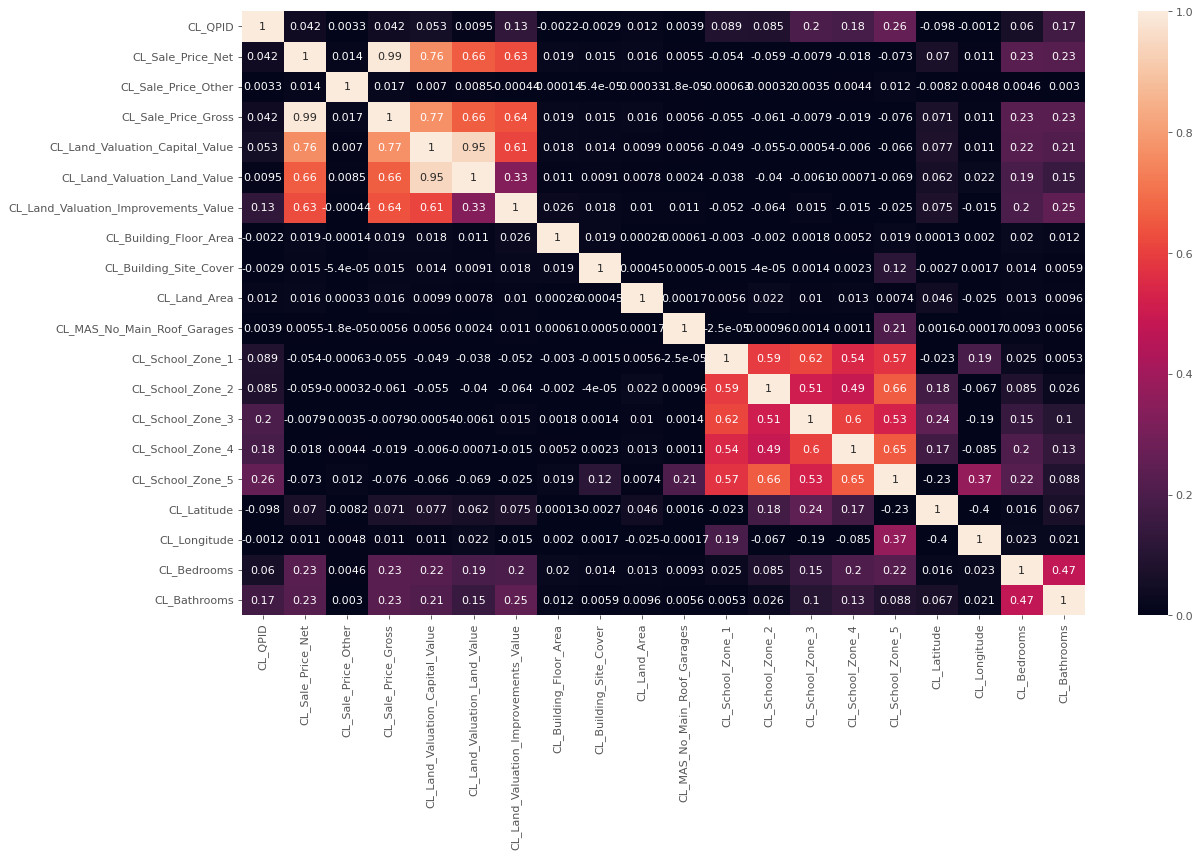

In [309]:
fig = plt.figure(figsize = (17,10), dpi = 80)
sns.heatmap(AKL_df.corr(), annot = True, vmin = 0, vmax = 1)

In [310]:
AKL_df = AKL_df.drop(['CL_Sale_Price_Other', 'CL_Sale_Price_Gross', 'CL_Land_Valuation_Land_Value', 'CL_Land_Valuation_Improvements_Value'], axis = 1)

In [311]:
zero_sale_price = AKL_df[AKL_df['CL_Sale_Price_Net'] == 0]
print(zero_sale_price.shape)

(18, 28)


In [312]:
AKL_df = AKL_df.drop(zero_sale_price.index)

In [313]:
AKL_df['Log_Sale_Price_Net'] = np.log(AKL_df['CL_Sale_Price_Net'])

/Users/chenyun/.conda/envs/research789/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [314]:
zero_logged_sale_price = AKL_df[AKL_df['Log_Sale_Price_Net']== 0]
print(zero_logged_sale_price.shape)

(86, 29)


In [315]:
AKL_df = AKL_df.drop(zero_logged_sale_price.index)

<AxesSubplot:xlabel='CL_Building_Site_Cover', ylabel='Log_Sale_Price_Net'>

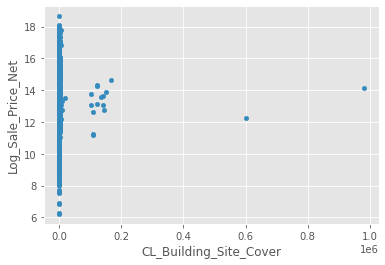

In [316]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Building_Site_Cover']], axis=1)
data.plot.scatter(x='CL_Building_Site_Cover', y='Log_Sale_Price_Net')

In [317]:
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Building_Site_Cover'] > 475].index)

<AxesSubplot:xlabel='CL_Building_Site_Cover', ylabel='Log_Sale_Price_Net'>

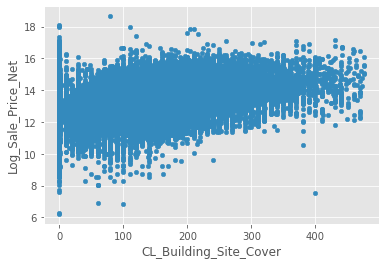

In [318]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Building_Site_Cover']], axis=1)
data.plot.scatter(x='CL_Building_Site_Cover', y='Log_Sale_Price_Net')

<AxesSubplot:xlabel='CL_Land_Area', ylabel='Log_Sale_Price_Net'>

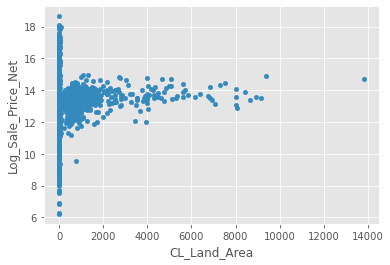

In [319]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Land_Area']], axis=1)
data.plot.scatter(x='CL_Land_Area', y='Log_Sale_Price_Net')

In [320]:
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Land_Area'] > 1.25].index)

<AxesSubplot:xlabel='CL_Land_Area', ylabel='Log_Sale_Price_Net'>

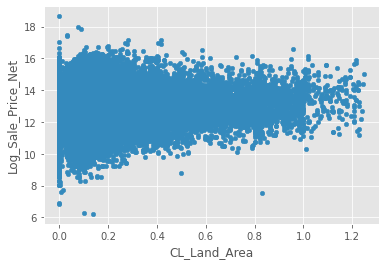

In [321]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Land_Area']], axis=1)
data.plot.scatter(x='CL_Land_Area', y='Log_Sale_Price_Net')

<AxesSubplot:xlabel='CL_MAS_No_Main_Roof_Garages', ylabel='Log_Sale_Price_Net'>

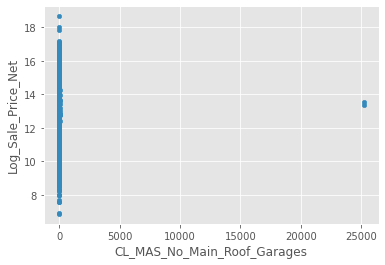

In [322]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_MAS_No_Main_Roof_Garages']], axis=1)
data.plot.scatter(x='CL_MAS_No_Main_Roof_Garages', y='Log_Sale_Price_Net')

In [323]:
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_MAS_No_Main_Roof_Garages'] > 6].index)

<AxesSubplot:xlabel='CL_MAS_No_Main_Roof_Garages', ylabel='Log_Sale_Price_Net'>

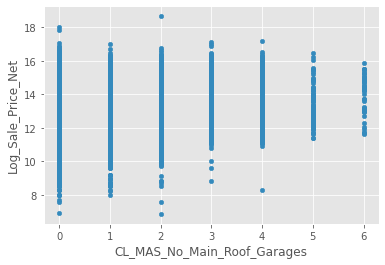

In [324]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_MAS_No_Main_Roof_Garages']], axis=1)
data.plot.scatter(x='CL_MAS_No_Main_Roof_Garages', y='Log_Sale_Price_Net')

<AxesSubplot:xlabel='CL_Building_Floor_Area', ylabel='Log_Sale_Price_Net'>

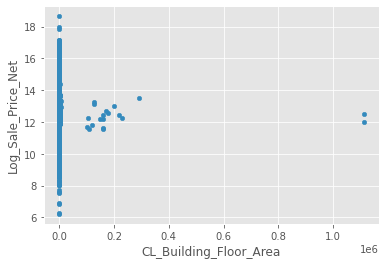

In [325]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Building_Floor_Area']], axis=1)
data.plot.scatter(x='CL_Building_Floor_Area', y='Log_Sale_Price_Net')

In [326]:
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Building_Floor_Area'] > 700].index)

<AxesSubplot:xlabel='CL_Building_Floor_Area', ylabel='Log_Sale_Price_Net'>

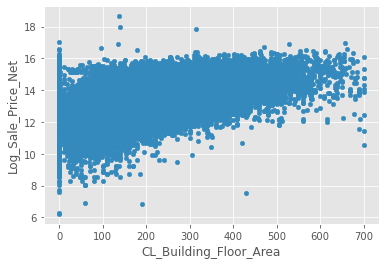

In [327]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Building_Floor_Area']], axis=1)
data.plot.scatter(x='CL_Building_Floor_Area', y='Log_Sale_Price_Net')

<AxesSubplot:xlabel='CL_Bedrooms', ylabel='Log_Sale_Price_Net'>

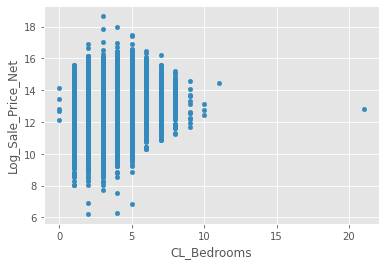

In [328]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Bedrooms']], axis=1)
data.plot.scatter(x='CL_Bedrooms', y='Log_Sale_Price_Net')

In [329]:
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Bedrooms'] > 9].index)

<AxesSubplot:xlabel='CL_Bedrooms', ylabel='Log_Sale_Price_Net'>

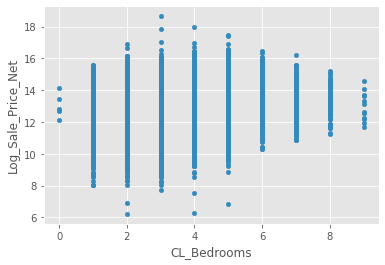

In [330]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Bedrooms']], axis=1)
data.plot.scatter(x='CL_Bedrooms', y='Log_Sale_Price_Net')

In [331]:
AKL_df = AKL_df.assign(school_count = AKL_df.loc[:, 'CL_School_Zone_1':'CL_School_Zone_5'].notna().sum(axis =1))
print(AKL_df.head())

       CL_QPID  CL_Suburb CL_Sale_Tenure CL_Sale_Date  CL_Sale_Price_Net  \
64588    75499    Te Arai              F   2009-02-09           280000.0   
64589    75639  Wellsford              F   1999-12-15           125000.0   
64590    75639  Wellsford              F   2004-02-25           255000.0   
64591    75639  Wellsford              F   1995-11-07            87000.0   
64592    75639  Wellsford              F   2003-07-07           222000.0   

       CL_Land_Valuation_Capital_Value CL_Current_Revision_Date  \
64588                         355000.0               2007-09-01   
64589                         120000.0               1998-09-01   
64590                         120000.0               2001-09-01   
64591                          85000.0               1995-09-01   
64592                         120000.0               2001-09-01   

       CL_Building_Floor_Area  CL_Building_Site_Cover  CL_Land_Area  \
64588                   120.0                   120.0        0.9850  

In [332]:
AKL_df = AKL_df.drop(['CL_School_Zone_1','CL_School_Zone_2','CL_School_Zone_3','CL_School_Zone_4','CL_School_Zone_5'], axis = 1)

In [333]:
AKL_df = AKL_df.drop(['CL_Current_Revision_Date','CL_Sale_Price_Net','CL_Val_Ref'], axis = 1)

In [334]:
AKL_df.isnull().sum()

CL_QPID                                 0
CL_Suburb                           12193
CL_Sale_Tenure                          0
CL_Sale_Date                            0
CL_Land_Valuation_Capital_Value       784
CL_Building_Floor_Area              11296
CL_Building_Site_Cover              25881
CL_Land_Area                           60
CL_Bldg_Const                      115379
CL_Bldg_Cond                       120279
CL_Roof_Const                       96734
CL_Roof_Cond                        98531
CL_Category                             0
CL_LUD_Age                         100134
CL_LUD_Land_Use_Description           173
CL_MAS_No_Main_Roof_Garages         62803
CL_Latitude                         20878
CL_Longitude                        20878
CL_Bedrooms                         20672
CL_Bathrooms                           14
Log_Sale_Price_Net                      8
school_count                            0
dtype: int64

<AxesSubplot:>

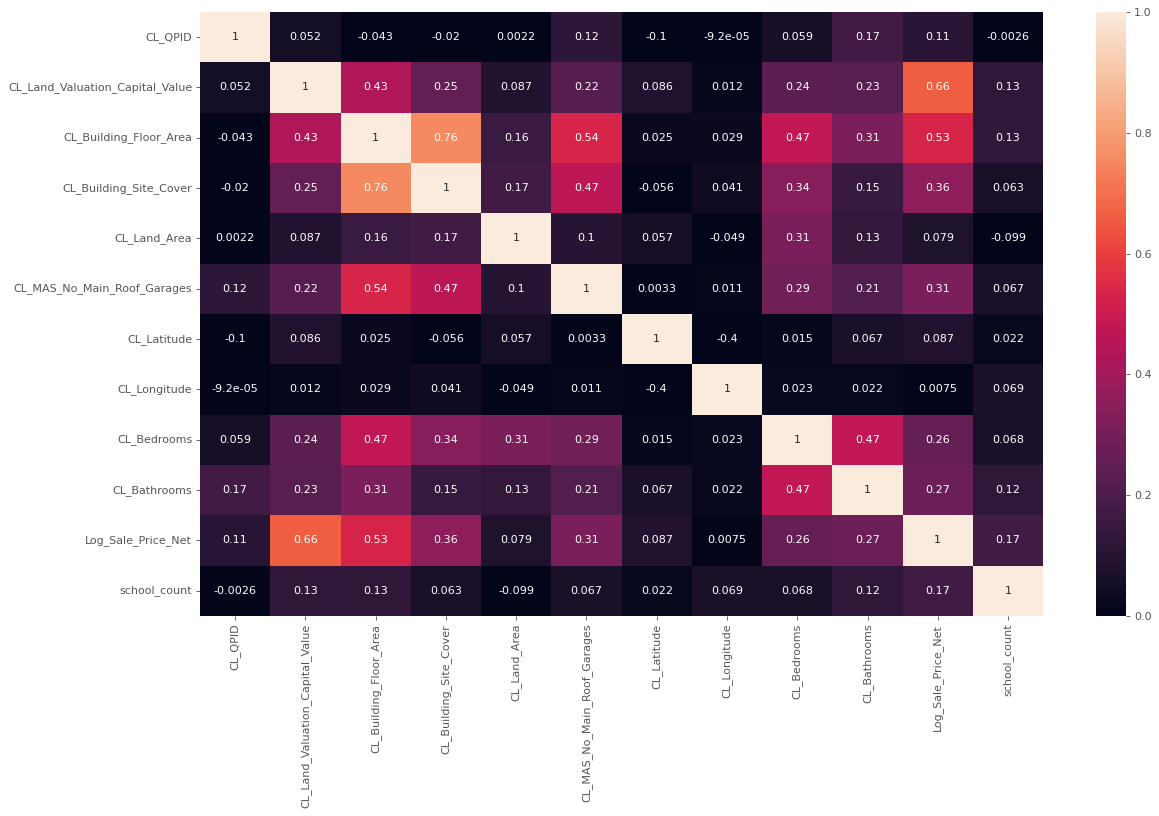

In [335]:
fig = plt.figure(figsize = (17,10), dpi = 80)
sns.heatmap(AKL_df.corr(), annot = True, vmin = 0, vmax = 1)

In [336]:
# remove category suffix
for i, row in AKL_df.iterrows():
    category = AKL_df['CL_Category'].loc[i][:2]
    AKL_df.at[i, 'CL_Category'] = category

AKL_df = AKL_df.drop(AKL_df[(AKL_df['CL_Category'] != 'RD') & (AKL_df['CL_Category'] != 'RA')].index)

In [337]:
AKL_df['CL_Building_Site_Cover'] = AKL_df['CL_Building_Site_Cover'].fillna(0)
AKL_df['CL_MAS_No_Main_Roof_Garages'] = AKL_df['CL_MAS_No_Main_Roof_Garages'].fillna(0)

AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Building_Floor_Area'].isnull()].index)
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Suburb'].isnull()].index)

In [338]:
for col in ('CL_Bldg_Const', 'CL_Roof_Const', 'CL_Bldg_Cond', 'CL_Roof_Cond'):
    AKL_df[col] = AKL_df[col].fillna('None')

In [339]:
AKL_df.isnull().sum()

CL_QPID                                0
CL_Suburb                              0
CL_Sale_Tenure                         0
CL_Sale_Date                           0
CL_Land_Valuation_Capital_Value      591
CL_Building_Floor_Area                 0
CL_Building_Site_Cover                 0
CL_Land_Area                          30
CL_Bldg_Const                          0
CL_Bldg_Cond                           0
CL_Roof_Const                          0
CL_Roof_Cond                           0
CL_Category                            0
CL_LUD_Age                          9407
CL_LUD_Land_Use_Description            8
CL_MAS_No_Main_Roof_Garages            0
CL_Latitude                         9226
CL_Longitude                        9226
CL_Bedrooms                        12427
CL_Bathrooms                           3
Log_Sale_Price_Net                     7
school_count                           0
dtype: int64

In [340]:
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Land_Valuation_Capital_Value'].isnull()].index)
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Latitude'].isnull()].index)
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Longitude'].isnull()].index)
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Land_Area'].isnull()].index)
AKL_df = AKL_df.drop(AKL_df[AKL_df['Log_Sale_Price_Net'].isnull()].index)
AKL_df.isnull().sum()

CL_QPID                                0
CL_Suburb                              0
CL_Sale_Tenure                         0
CL_Sale_Date                           0
CL_Land_Valuation_Capital_Value        0
CL_Building_Floor_Area                 0
CL_Building_Site_Cover                 0
CL_Land_Area                           0
CL_Bldg_Const                          0
CL_Bldg_Cond                           0
CL_Roof_Const                          0
CL_Roof_Cond                           0
CL_Category                            0
CL_LUD_Age                          7853
CL_LUD_Land_Use_Description            8
CL_MAS_No_Main_Roof_Garages            0
CL_Latitude                            0
CL_Longitude                           0
CL_Bedrooms                        12146
CL_Bathrooms                           3
Log_Sale_Price_Net                     0
school_count                           0
dtype: int64

In [341]:
AKL_df['CL_Bathrooms'] = AKL_df['CL_Bathrooms'].fillna(0)
AKL_df=AKL_df.drop(AKL_df[AKL_df['CL_LUD_Land_Use_Description'].isnull()].index)
AKL_df['CL_LUD_Age'] = AKL_df['CL_LUD_Age'].fillna('None')
AKL_df.isnull().sum()

CL_QPID                                0
CL_Suburb                              0
CL_Sale_Tenure                         0
CL_Sale_Date                           0
CL_Land_Valuation_Capital_Value        0
CL_Building_Floor_Area                 0
CL_Building_Site_Cover                 0
CL_Land_Area                           0
CL_Bldg_Const                          0
CL_Bldg_Cond                           0
CL_Roof_Const                          0
CL_Roof_Cond                           0
CL_Category                            0
CL_LUD_Age                             0
CL_LUD_Land_Use_Description            0
CL_MAS_No_Main_Roof_Garages            0
CL_Latitude                            0
CL_Longitude                           0
CL_Bedrooms                        12146
CL_Bathrooms                           0
Log_Sale_Price_Net                     0
school_count                           0
dtype: int64

In [348]:
AKL_df=AKL_df.drop(AKL_df[AKL_df['CL_Bedrooms'].isnull()].index)
AKL_df.isnull().sum()

CL_QPID                            0
CL_Suburb                          0
CL_Sale_Tenure                     0
CL_Sale_Date                       0
CL_Land_Valuation_Capital_Value    0
CL_Building_Floor_Area             0
CL_Building_Site_Cover             0
CL_Land_Area                       0
CL_Bldg_Const                      0
CL_Bldg_Cond                       0
CL_Roof_Const                      0
CL_Roof_Cond                       0
CL_Category                        0
CL_LUD_Age                         0
CL_LUD_Land_Use_Description        0
CL_MAS_No_Main_Roof_Garages        0
CL_Latitude                        0
CL_Longitude                       0
CL_Bedrooms                        0
CL_Bathrooms                       0
Log_Sale_Price_Net                 0
school_count                       0
dtype: int64

In [342]:
print(AKL_df.head(10))

       CL_QPID  CL_Suburb CL_Sale_Tenure CL_Sale_Date  \
64588    75499    Te Arai              F   2009-02-09   
64589    75639  Wellsford              F   1999-12-15   
64590    75639  Wellsford              F   2004-02-25   
64591    75639  Wellsford              F   1995-11-07   
64592    75639  Wellsford              F   2003-07-07   
64609    75654  Wellsford              F   2005-01-27   
64610    75654  Wellsford              F   1998-12-17   
64611    75654  Wellsford              F   2004-03-31   
64612    75654  Wellsford              F   2013-09-17   
64613    75654  Wellsford              F   2007-05-31   

       CL_Land_Valuation_Capital_Value  CL_Building_Floor_Area  \
64588                         355000.0                   120.0   
64589                         120000.0                   120.0   
64590                         120000.0                   120.0   
64591                          85000.0                   120.0   
64592                         120000.0    

In [343]:
for i, row in AKL_df.iterrows():
    sale_date = AKL_df['CL_Sale_Date'].loc[i]
    rfind_s = sale_date.rfind('-')
    date = sale_date[:rfind_s].replace('-', '')
    AKL_df.at[i, 'CL_Sale_Date'] = date

# Encode string column

In [354]:
object_cols = AKL_df.columns[AKL_df.dtypes == 'object']

for col in object_cols:
    encoder = LabelEncoder()
    encoder.fit(list(AKL_df[col].values))
    AKL_df[col] = encoder.transform(list(AKL_df[col].values))
print(AKL_df[object_cols])

         CL_Suburb  CL_Sale_Tenure  CL_Sale_Date  CL_Bldg_Const  CL_Bldg_Cond  \
64588          232               0           229             13             1   
64589          263               0           119              3             1   
64590          263               0           169              3             1   
64591          263               0            70              3             1   
64592          263               0           162              3             1   
...            ...             ...           ...            ...           ...   
3218021          9               0           321              2             2   
3218095        202               0           355             13             2   
3218096        169               0           361              1             2   
3218097        169               0           361              1             2   
3218218        266               0           316             13             2   

         CL_Roof_Const  CL_

# Numeric Column Preprocess

In [344]:
numeric_cols = ['CL_Land_Valuation_Capital_Value', 'CL_Building_Floor_Area',
       'CL_Building_Site_Cover', 'CL_Land_Area', 'CL_MAS_No_Main_Roof_Garages',
       'CL_Bedrooms', 'CL_Bathrooms']
print(numeric_cols)

['CL_Land_Valuation_Capital_Value', 'CL_Building_Floor_Area', 'CL_Building_Site_Cover', 'CL_Land_Area', 'CL_MAS_No_Main_Roof_Garages', 'CL_Bedrooms', 'CL_Bathrooms']


In [345]:
numeric_col_means = AKL_df.loc[:, numeric_cols].mean()
numeric_col_std = AKL_df.loc[:, numeric_cols].std()
AKL_df.loc[:, numeric_cols] = (AKL_df.loc[:, numeric_cols] - numeric_col_means) /numeric_col_std

In [346]:
sc = StandardScaler()
AKL_df.loc[:, numeric_cols] = sc.fit_transform(AKL_df.loc[:, numeric_cols])

In [347]:
print(AKL_df.head(10))

       CL_QPID  CL_Suburb CL_Sale_Tenure CL_Sale_Date  \
64588    75499    Te Arai              F       200902   
64589    75639  Wellsford              F       199912   
64590    75639  Wellsford              F       200402   
64591    75639  Wellsford              F       199511   
64592    75639  Wellsford              F       200307   
64609    75654  Wellsford              F       200501   
64610    75654  Wellsford              F       199812   
64611    75654  Wellsford              F       200403   
64612    75654  Wellsford              F       201309   
64613    75654  Wellsford              F       200705   

       CL_Land_Valuation_Capital_Value  CL_Building_Floor_Area  \
64588                        -0.294735               -0.397669   
64589                        -0.799770               -0.397669   
64590                        -0.799770               -0.397669   
64591                        -0.874988               -0.397669   
64592                        -0.799770    

In [359]:
AKL_df.to_csv("./outputs/cleaned_property_data.csv")